# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

## Answers
My work starts here! I will first load necessary packages and the dataset and check the loaded dataframe briefly.

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import pylab # for qqplot
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats
import seaborn as sns

In [1]:
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


### 1. Is the distribution of body temperatures normal?

#### Using plots

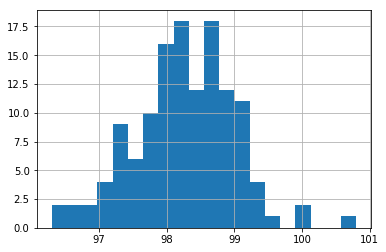

In [86]:
# Using histogram
df.temperature.hist(bins=20)
plt.show()

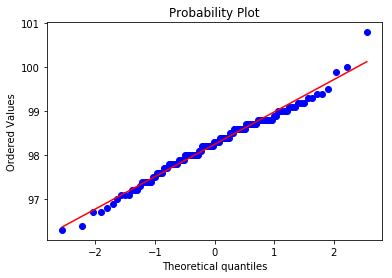

In [87]:
# Using Quantile-Quantile plot
stats.probplot(df.temperature, dist="norm", plot=pylab)
pylab.show()

Both histogram and Quantile-Quantile plot (QQplot) show that the sample body temperatures are normally distributed. However, the QQplot shows there is one possible outlier with a high temperature over 100. 

#### Using frequentist tests

In [169]:
def print_result(outputs, title, label_1='test statistic', 
                 label_2='p-value', digits = 4):
    print(title)
    print(label_1, ": ", round(outputs[0],digits))
    print(label_2, ": ", round(outputs[1],digits))

In [170]:
# Using  Lilliefors test
output_lil = sm.stats.lilliefors(df.temperature)
print_result(output_lil,"Lilliefors test")

Lilliefors test
test statistic :  0.0647
p-value :  0.1869


In [171]:
# Using Anderson-Darling test
output_AD = sm.stats.normal_ad(df.temperature)
print_result(output_AD,"Anderson-Darling test")

Anderson-Darling test
test statistic :  0.5201
p-value :  0.1829


In [172]:
# Shapiro-Wilk test
output_SW = stats.shapiro(df.temperature)
print_result(output_SW,"Shapiro-Wilk test")

Shapiro-Wilk test
test statistic :  0.9866
p-value :  0.2332


I also tried three frequentist tests for normality above. All of the tests gave small p-values (over .05), so we fail to reject the null hypothesis that the data is normally distributed. The Kolmogorov–Smirnov test is another popular normality test, but I did not use it because the population mean and standard deviation are unknown.

Both graphical methods and normality tests show the body temperature is normally distributed.

reference: https://stackoverflow.com/questions/7903977/implementing-a-kolmogorov-smirnov-test-in-python-scipy

### 2. Is the sample size large? Are the observations independent?

#### Sample size

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


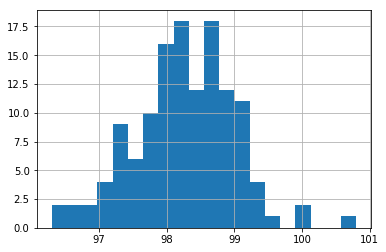

In [51]:
df.temperature.hist(bins=20)
plt.show()

The Central Limit Theorem (CLT) says the sample mean is normally distributed if the sample size is big enough. If the distribution of a sample is symmetric and unimodal, a sample size over 30 is regarded as big enough to use CLT. Our sample is large enough since its size is 130 and the above histogram of body temperature shows the distribution looks symmetric and unimodal. 

#### Independence

Since the sample size is small enough which is much less than 10% of population size, we can assume the observations are independent.

### 3. Is the true population mean really 98.6 degrees F?

#### Bootstrap hypothesis test

In [73]:
# Observed mean
sample_mean = np.mean(df.temperature)
print('Sample mean:', sample_mean)

Sample mean: 98.24923076923075


In [100]:
# Make an array of translated temperatures with mean 98.6
translated_temp = df.temperature - sample_mean + 98.6

# Take bootstrap replicates of translated temperature
def draw_bs_replicates(data, func, size):
    return np.array([func(np.random.choice(data, len(data))) for _ in range(size)])

bs_replicates = draw_bs_replicates(translated_temp, np.mean, 10000)

# Compute fraction of replicates less than the observed mean
p = np.sum(bs_replicates <= sample_mean) / 10000

# Print p-value
print('p-value: ', p)

p-value:  0.0


The bootstrap hypothesis test gave p-value 0.0, which is less than 0.5. Thus, we __reject the null__ hypothesis that the population mean is 98.6. The population mean is significantly less than 98.6.

#### Frequentist hypothesis test

I will use a __one-sample test__ because I only have one sample which will be compared to the single value 98.6 in the null hypothesis.

I will use__ _t_ statistic __since the population standard deviation is unknown. However, using _z_ statistic would be also fine because _t_ statistic is similar to _z_ statistic if a sample size is big enough. I will test both statistics to check this.

#### t-test

In [177]:
output_t = stats.ttest_1samp(df.temperature, 98.6)
print_result(output_t,"t-test", digits=10)

t-test
test statistic :  -5.4548232924
p-value :  2.411e-07


The above shows t statistic (-5.4548) and p-value close to zero from the two-sided one sample t-test. Since p-value is less than 0.05, we __reject the null__ hypothesis that the population mean is 98.6. The sample mean is significantly different from 98.6.

#### z-test

In [173]:
output_z = statsmodels.stats.weightstats.ztest(x1=df.temperature, x2=None, value=98.6, alternative='two-sided') 
print_result(output_z,"z-test", digits=10)

z-test
test statistic :  -5.4548232924
p-value :  4.9e-08


The above are the results from the two-sided one sample z-test. The z statistic is -5.4548 and p-vavlue is close to zero. Since p-value is less than 0.05, we __reject the null__ hypothesis that the population mean is 98.6. The sample mean temperature is significantly different from 98.6.

As expected earlier, z statistic and t statistic give similar results since the sample size is big enough. Their statistics are the same up to 16 digits and p-values are similiarly close to zero. The p-value for the t-test is slightly bigger than that for the z-test since the t statistic has fatter tails.

### 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [112]:
# Draw a small sample of size 10
temperature_10 = np.random.choice(df.temperature, 10)
temperature_10

array([98.3, 97.6, 98.3, 97.9, 98.8, 97.6, 98.2, 98.4, 99.5, 97.4])

In [183]:
# t-test
output_t= stats.ttest_1samp(temperature_10, 98.6)
print_result(output_t,"t-test", digits=16)

t-test
test statistic :  -2.0112045694620013
p-value :  0.0751817799913151


In [182]:
# z-test
output_z = statsmodels.stats.weightstats.ztest(x1=temperature_10, x2=None, value=98.6, alternative='two-sided')
print_result(output_z,"z-test", digits=16)

z-test
test statistic :  -2.0112045694620018
p-value :  0.044303853331963


Their test statistics are still very similar (same up the 15th decimal point), but their p-values are very different!! The t-test has p-value .0752 (over .05) while the z-test has p-value .0443 (less than .05). __Therefore, we fail to reject the null hypothesis using the t-test, but we can reject the null using the z-test__.

In this case, __t-test is more appropriate__ since the population standard deviation is unknown and the sample size so small. The t-distribution with a small sample size (i.e., low degree of freedom) is very different from the normal distribution due to fatter tails. Therefore, the z-test cannot be used in this case. This example shows that only t-test is appropriate for a small sample while both t-test and z-test are fine for a big enough sample.

### 5. At what temperature should we consider someone's temperature to be "abnormal"?

In [265]:
bs_replicates = np.random.choice(df.temperature, 1000000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print("95% Bootstrap conf. interval: ", conf_int)

95% Bootstrap conf. interval:  [96.7 99.5]


In [261]:
m = np.mean(df.temperature)
alpha =0.05  # 1-confidence level
critical_value = stats.norm.ppf(1-alpha/2)  # z* = 1.96
MOE = critical_value*np.std(df.temperature) # z* times std (not divided by sqrt(N)!!)
conf_int = [round(m - MOE,4), round(m + MOE,4)]
print("95% z conf. interval:", conf_int)

95% z conf. interval: [96.8178, 99.6807]


We found the distribution of the sample temperatures are approximately normal in the first question, so I used the critical value for z statistic to calculate the margin of error. The Boostrap and z-statistic confidence intervals with 95% confidence level are similar. We should consider a temperature as "abnormal" if it is not included in these intervals.

### 6. Is there a significant difference between males and females in normal temperature?

I will first get the subset of data with normal temperatures using 95% boostrap confidence interval found in the above question.

In [278]:
df[(df.temperature < 96.7) | (df.temperature > 99.5)]

,temperature,gender,heart_rate
39,96.4,F,69.0
91,100.0,F,78.0
96,99.9,F,79.0
116,100.8,F,77.0
125,96.3,M,70.0


The above 5 observations will be removed since they have abnormal body temperatures.

In [279]:
df_normal = df[(df.temperature >= 96.7) & (df.temperature <= 99.5)]
len(df_normal)

125

In [301]:
df_normal.gender.value_counts()

M    64
F    61
Name: gender, dtype: int64

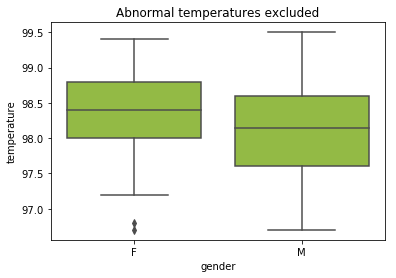

In [305]:
sns.boxplot(x='gender', y='temperature', data = df_normal, color='yellowgreen')
plt.title('Abnormal temperatures excluded')
plt.show()

In [283]:
temperature_female = df_normal.temperature[df_normal.gender=='F']
temperature_male = df_normal.temperature[df_normal.gender=='M']

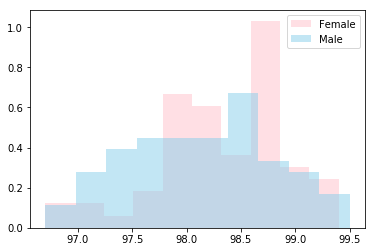

In [284]:
plt.hist(temperature_female, alpha =.5, density=True, color='pink')
plt.hist(temperature_male, alpha =.5, density=True, color='skyblue')
plt.legend(('Female', 'Male'))
plt.show()

The boxplots and histograms suggest that a body temperature of females tends to be higher than that of males. I will find out whether the difference between men and women is significant using hypothesis tests.

In [293]:
# t-test
output_t = stats.ttest_ind(temperature_female, temperature_male)
print_result(output_t,"t-test", digits=4)

t-test
test statistic :  1.8089
p-value :  0.0729


In [294]:
# z-test
output_z = statsmodels.stats.weightstats.ztest(temperature_female, temperature_male) 
print_result(output_z,"z-test", digits=4)

z-test
test statistic :  1.8089
p-value :  0.0705


I used the two-sided two-sample independent t-test to compare the female and male groups since the two samples are not paired (independent) and the population standard deviations are unknown. I additionally tried the corresponding z-test and it gave a similar result since the sample size is big enough. The p-value is bigger than 0.05, so we fail to rejec the null hypothesis that the female and male groups have the same population mean temperature. In other words, body temperatures of men and women are not significantly different. 

#### What if the abnormal temperatures were not removed?

In [306]:
# Observations with abnormal body temperatures
df[(df.temperature < 96.7) | (df.temperature > 99.5)]

,temperature,gender,heart_rate
39,96.4,F,69.0
91,100.0,F,78.0
96,99.9,F,79.0
116,100.8,F,77.0
125,96.3,M,70.0


The above removed temperatures made me wonder how the result will be different if I include these abnormal temeperatures? Since all the high abnormal temperatures are from women, including these can lead to significant difference between men and women. I will found out here.

In [302]:
# t-test 
output_t = stats.ttest_ind(df.temperature[df.gender=='F'],df.temperature[df.gender=='M'])
print_result(output_t,"t-test", digits=4)

t-test
test statistic :  2.2854
p-value :  0.0239


The p-value is smaller than 0.05 if the outliers are included!! If we do not exclude the observations with abnormal temperatures, we can conclude that men and women have significantly different body temperatures. This shows how a few outliers can affect the test result. Now I wonder, did the study by Carl Wunderlich exclude participants who had fevers?

### Appendix (no need to be graded)
#### Alternative answer using confidence intervals for question 3

In [235]:
# Bootstrap confidence interval
bs_replicates = draw_bs_replicates(df.temperature, np.mean, 10000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print("95% Bootstrap conf. interval of the mean: ", conf_int)

95% Bootstrap conf. interval of the mean:  [98.12076923 98.37384615]


In [242]:
def conf_interval(data, alpha, statistic, digits):
    '''
    print sample mean, critical value, margin of error, 
    and confidence interval of the mean for a given statistic (z or t), 
    alpha (= 1-confidence level) and
    digits (number of decimal points to be printed)
    '''
    m = np.mean(data)
    print("sample mean:", round(m, digits))
    
    if statistic == 't': # t-distribution
        critical_value = stats.t.ppf(1-alpha/2, len(data)-1) # critical t value
    elif statistic =='z': # z-distribution
        critical_value = stats.norm.ppf(1-alpha/2)
    else:
        print("Invalid distribution!!!")
    print(statistic, "critical value:", round(critical_value,digits))
    
    MOE = critical_value*np.std(data)/np.sqrt(len(data))
    print("Margin of Error:", round(MOE,digits))

    conf_int = [round(m - MOE,digits), round(m + MOE,digits)]
    print(int((1-alpha)*100), "%", statistic, "conf. interval of the mean:", conf_int)

In [243]:
conf_interval(df.temperature, 0.05,'t', digits=4)

sample mean: 98.2492
t critical value: 1.9785
Margin of Error: 0.1267
95 % t conf. interval of the mean: [98.1225, 98.376]


In [244]:
conf_interval(df.temperature, 0.05,'z', digits=4)

sample mean: 98.2492
z critical value: 1.96
Margin of Error: 0.1255
95 % z conf. interval of the mean: [98.1237, 98.3748]


The 95% confidence intervals of the mean for bootstrap, t distribution and z distribution are similar. They are the same up to second decimal point!! None of these intervals contains 98.6, so we reject the null and conclude that the population mean is significantly different from 98.6.